In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter


In [155]:
tweets_sentiments = pd.read_csv('../data/interim/bitcoin_all_tweets_sentiments_20210101-20210930.csv', index_col = 0)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [156]:
tweets_sentiments.head()


,id,date,text,hashtags,replyCount,retweetCount,likeCount,userName,userFollowerCount,userFavCount,userFriendCount,dateTime,textLength,prediction,negative,neutral,positive
0,1443727347832791045,2021-09-30 23:59:57+00:00,btc ends q3 +26.7%,NaN,2.0,0.0,45.0,tier10k,6614.0,4029.0,1620.0,2021-09-30 23:59:57+00:00,18,neutral,0.0145,0.7970,0.1886
1,1443727346670845993,2021-09-30 23:59:57+00:00,exchange or exchange of new crypto assets usua...,"['euler', 'bsc', 'crypto', 'ethereum']",0.0,1.0,1.0,Rofiqul52509717,3311.0,5963.0,4968.0,2021-09-30 23:59:57+00:00,197,positive,0.0021,0.2555,0.7424
2,1443727338575958019,2021-09-30 23:59:55+00:00,returns over the last 10 years: bitcoin $btc: ...,NaN,0.0,0.0,1.0,iamfkr2,8.0,152.0,151.0,2021-09-30 23:59:55+00:00,266,negative,0.6298,0.3230,0.0472
3,1443727338169114633,2021-09-30 23:59:55+00:00,this whale isn't afraid of why should you be? ...,"['chinafud', 'bitcoin', 'cryptocurrency', 'cry...",0.0,0.0,0.0,welcomecatena,1409.0,8538.0,2099.0,2021-09-30 23:59:55+00:00,50,neutral,0.1539,0.7342,0.1119
4,1443727335878967296,2021-09-30 23:59:54+00:00,current bitcoin transaction fees: bch next blo...,NaN,0.0,0.0,0.0,BitcoinFeesCash,596.0,374.0,392.0,2021-09-30 23:59:54+00:00,117,neutral,0.1366,0.8302,0.0332


In [157]:
tweets_sentiments['dateTime']= pd.to_datetime(tweets_sentiments['dateTime'])


In [158]:
tweets_sentiments = tweets_sentiments[['id', 'dateTime', 'prediction']]

tweets_sentiments.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 3549484 entries, 0 to 3552412
Data columns (total 3 columns):
 #   Column      Dtype              
---  ------      -----              
 0   id          int64              
 1   dateTime    datetime64[ns, UTC]
 2   prediction  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(1)
memory usage: 108.3+ MB


In [159]:
two_h_span = tweets_sentiments.groupby('prediction').resample('2H', on='dateTime').count()

daily_span = tweets_sentiments.groupby('prediction').resample('D', on='dateTime').count()



In [160]:
two_h_span = two_h_span.unstack('prediction', fill_value=0)
two_h_span = two_h_span[('id')]

daily_span = daily_span.unstack('prediction', fill_value=0)
daily_span = daily_span[('id')]


In [161]:
two_h_span.index.name = None

two_h_span.columns.name = 'dateGroup'

#two_h_span.loc['2021-09-10':'2021-09-30']


daily_span.index.name = None

daily_span.columns.name = 'dateGroup'

#daily_span.loc['2021-09-10':'2021-09-30']


In [195]:
def calc_percentage(df):
    df['total'] = df['negative'] + df['neutral'] + df['positive']
    df['pos_percent'] = df['positive'] / df['total'] * 100 
    df['neu_percent'] = df['neutral'] / df['total'] * 100
    df['neg_percent'] = df['negative'] / df['total'] * 100


calc_percentage(daily_span)
calc_percentage(two_h_span)

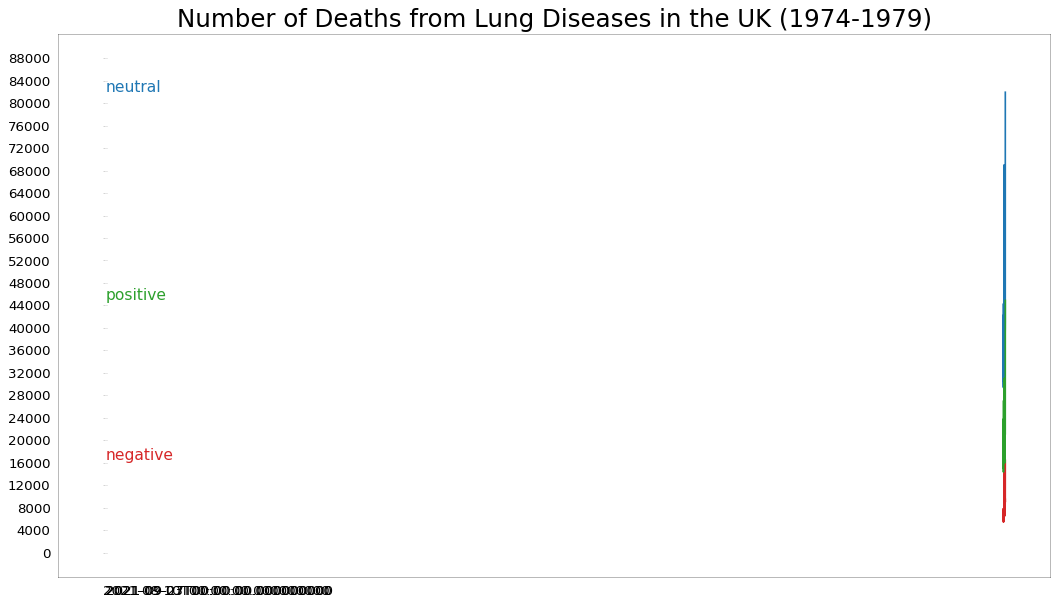

In [181]:
plot = daily_span

# Define the upper limit, lower limit, interval of Y axis and colors
y_LL = 0
y_UL = int(plot.iloc[:, 1:].max().max()*1.1)
#y_UL = 50000
y_interval = 4000
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']    

# Draw Plot and Annotate
fig, ax = plt.subplots(1,1,figsize=(16, 9), dpi= 80)    

columns = plot.columns[:3]  
for i, column in enumerate(columns):    
    valt = plot[column].values
    plt.plot(plot.index.values, plot[column].values, lw=1.5, color=mycolors[i])    
    plt.text(plot.shape[0]+1, plot[column].values[-1], column, fontsize=14, color=mycolors[i])

# Draw Tick lines  
for y in range(y_LL, y_UL, y_interval):    
    plt.hlines(y, xmin=0, xmax=71, colors='black', alpha=0.3, linestyles="--", lw=0.5)

# Decorations    
plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)        

# Lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

plt.title('a sample title', fontsize=22)
plt.yticks(range(y_LL, y_UL, y_interval), [str(y) for y in range(y_LL, y_UL, y_interval)], fontsize=12)    
plt.xticks(range(0, plot.shape[0], 24), plot.index.values[::24], horizontalalignment='left', fontsize=12)    


plt.ylim(y_LL, y_UL)    
plt.xlim(-2, 80)    
plt.show()

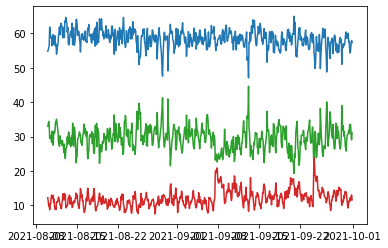

In [197]:
plot = two_h_span

x = plot.index.values
#pos = plot['positive']
#neu = plot['neutral']
#neg = plot['negative']

pos = plot['pos_percent']
neu = plot['neu_percent']
neg = plot['neg_percent']

mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']    

plt.plot(x,pos, color=mycolors[2])

plt.plot(x,neu, color=mycolors[1])
plt.plot(x,neg, color=mycolors[0])

plt.show()
